# Convolutional Neural Networks without framework

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.random.seed(1)

## Zero padding

In [8]:
def zero_pad(X, pad):
    padded_X = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), "constant", constant_values=0)
    return padded_X

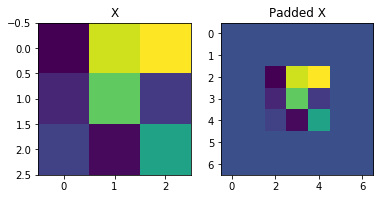

In [15]:
m = 4 # Number of sample
H = 3 # Height
W = 3 # Width
C = 2 # Channel

X = np.random.randn(m, H, W, C)
padded_X = zero_pad(X, 2)

fig, axes = plt.subplots(1, 2)
axes[0].set_title("X")
axes[0].imshow(X[0, :, :, 0])
axes[1].set_title("Padded X")
axes[1].imshow(padded_X[0, :, :, 0])

## Single step of convolution

In [ ]:
def single_step_conv(a_slice_prev, W, b):
    